In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import cv2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



2023-10-27 14:45:07.988196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


> 1. Data Preprocessing

In [2]:
#Loading Labels
train_label = pd.read_csv('train.csv')
test_label  = pd.read_csv('test.csv')

In [3]:
train_img_name = train_label['filename']
train_img_class = train_label['class']

In [4]:
encoder_2 = LabelEncoder()

>2. Training Data

In [5]:
#Empthy List for extracting necessary data
train_img_file = []
train_img_label = []


## Loop through the the training data to extract images and their conresponding class
for i,j in enumerate(train_img_name):
    #read each image
    image = cv2.imread(os.path.join('train', j))

    #resize each image
    image = cv2.resize(image,(224,224))

    #Normalize image pixel to facilitate convergence and improve model performance
    image = image / 255.0
    
    #save the processed image to our training image list
    train_img_file.append(image)
    
    #saved the matching class of each image in a separate list
    train_img_label.append(train_img_class[i])

## Prepare for model training

train_x = np.array(train_img_file)
train_y = np.array(train_img_class)
y_train = encoder_2.fit_transform(train_y)

>3. Test Data

In [6]:
test_img_name = test_label['filename']
test_img_class = test_label['class']

#Empthy List for extracting necessary data
test_img_file = []
test_img_label = []


## Loop through the the training data to extract images and their conresponding class
for i,j in enumerate(test_img_name):
    #read each image
    imag = cv2.imread(os.path.join('test', j))

    #resize each image
    imag = cv2.resize(imag,(224,224))

    #Normalize image pixel to facilitate convergence and improve model performance
    imag = imag / 255.0
    
    #save the processed image to our training image list
    test_img_file.append(imag)
    
    #saved the matching class of each image in a separate list
    test_img_label.append(test_img_class[i])


## Prepare for data for model training

test_x = np.array(test_img_file)
test_y = np.array(test_img_class)
y_test = encoder_2.fit_transform(test_y)



>4. Model Design

In [7]:
## Model Design

model = keras.Sequential([
    #Convolutional Blocks
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),

    #Prepare the data for connection to fully connected layers
    keras.layers.Flatten(),

    #Fully Connected Layer
    keras.layers.Dense(64, activation='relu'),

    #output layer
    keras.layers.Dense(3, activation='softmax')
])

In [8]:
## Model Compilation

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
## Model Training

Results = model.fit(train_x, y_train, epochs=10, validation_data=(test_x, y_test))

Epoch 1/10
41/41 [==============================] - 43s 1s/step - loss: 1.1706 - accuracy: 0.5027 - val_loss: 0.9973 - val_accuracy: 0.5044
Epoch 2/10
41/41 [==============================] - 42s 1s/step - loss: 0.5890 - accuracy: 0.7532 - val_loss: 1.1776 - val_accuracy: 0.4336
Epoch 3/10
41/41 [==============================] - 42s 1s/step - loss: 0.4046 - accuracy: 0.8296 - val_loss: 1.0520 - val_accuracy: 0.6283
Epoch 4/10
41/41 [==============================] - 41s 1s/step - loss: 0.3562 - accuracy: 0.8694 - val_loss: 1.6890 - val_accuracy: 0.4159
Epoch 5/10
41/41 [==============================] - 41s 997ms/step - loss: 0.2986 - accuracy: 0.8854 - val_loss: 1.4327 - val_accuracy: 0.5221
Epoch 6/10
41/41 [==============================] - 41s 996ms/step - loss: 0.2940 - accuracy: 0.8801 - val_loss: 1.0121 - val_accuracy: 0.5133
Epoch 7/10
41/41 [==============================] - 41s 996ms/step - loss: 0.2861 - accuracy: 0.8770 - val_loss: 1.2587 - val_accuracy: 0.4602
Epoch 8/10


>5. Prediction

In [10]:
## Predict on the test data
Predictions= model.predict(test_x)

4/4 [==============================] - 1s 328ms/step


In [11]:
## Save the classes predicted
pred_class = Predictions.argmax(-1)

In [12]:
## Prediction result in a df
pred_df = pd.DataFrame(pred_class)
pred_df['true Y'] = y_test
pred_df

,0,true Y
0,2,0
1,0,0
2,0,0
3,2,0
4,1,0
...,...,...
108,2,2
109,2,2
110,2,2
111,2,2


>6. Model Performance Visualization

In [13]:
# Extract Loss information from the model training results
loss = Results.history['loss']
val_loss = Results.history['val_loss']

In [15]:
# Compile it in a dataframe for visualition 
epchs = {'epochs': range(1,11)}

resultdf = pd.DataFrame(epchs)
resultdf['loss'] = loss
resultdf['val_loss'] = val_loss

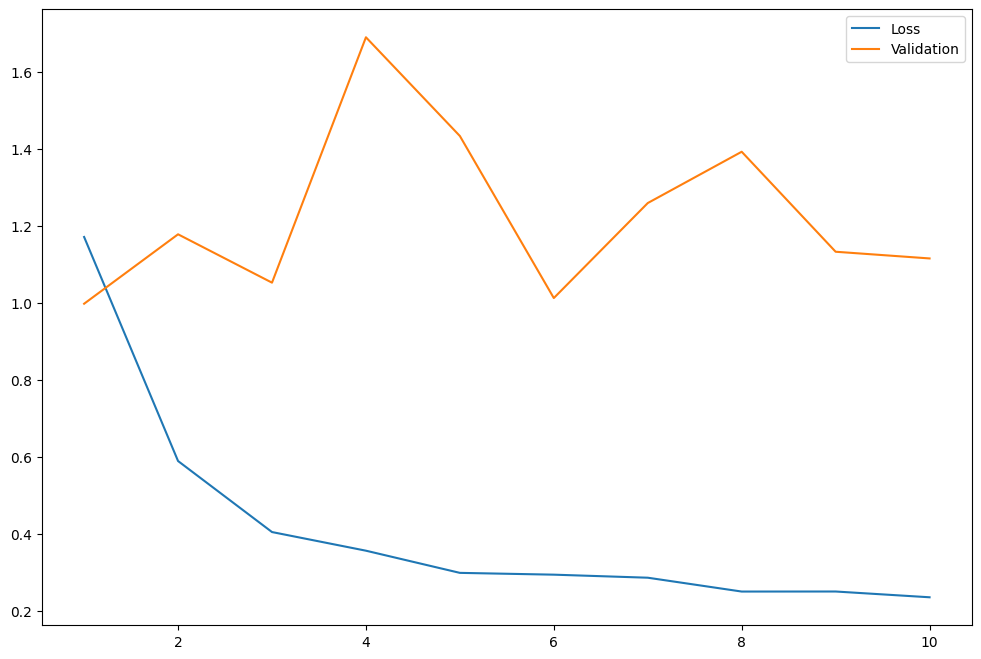

In [16]:
## Plot loss information to visualize model performance

plt.figure(figsize=(12,8))
plt.plot(resultdf['epochs'], resultdf['loss'], label = 'Loss')
plt.plot(resultdf['epochs'], resultdf['val_loss'], label = 'Validation')

plt.legend()